In [1]:
import numpy as np
import pandas as pd
import json


In [2]:
feb11_pd=pd.read_json("processed211.json", orient='records', lines=True).set_index('id')
train_pd=feb11_pd
#may11_pd=pd.read_json("processed_11-05.json", orient='records', lines=True).set_index('id')
#jul11_pd=pd.read_json("processed_11-07.json", orient='records', lines=True).set_index('id')
#aug11_pd=pd.read_json("processed_11-08.json", orient='records', lines=True).set_index('id')

#pd_list=[feb11_pd,may11_pd,jul11_pd,aug11_pd]

#train_pd=pd.concat(pd_list)

train_pd

,label,subreddit,vectors
id,,,
g4fyd,5,AskReddit,"{'type': 0, 'size': 8345, 'indices': [0, 2, 12..."
g4fy0,2,buildapc,"{'type': 0, 'size': 8345, 'indices': [1, 2, 3,..."
g4fwe,5,tipofmytongue,"{'type': 0, 'size': 8345, 'indices': [0, 8, 18..."
g4fvm,5,AskReddit,"{'type': 0, 'size': 8345, 'indices': [8, 18, 1..."
g4fph,4,trees,"{'type': 0, 'size': 8345, 'indices': [5, 9, 11..."
g4fnr,5,AskReddit,"{'type': 0, 'size': 8345, 'indices': [0, 3, 11..."
g4fmf,5,Advice,"{'type': 0, 'size': 8345, 'indices': [0, 10, 1..."
g4fhn,5,reddit.com,"{'type': 0, 'size': 8345, 'indices': [0, 1, 2,..."
g4fgs,5,AskReddit,"{'type': 0, 'size': 8345, 'indices': [2, 3, 11..."


In [3]:
distributed_pd=train_pd.reset_index()
distributed_pd['i']=distributed_pd.loc[:,'vectors'].apply(lambda x: x['indices'])
distributed_pd['v']=distributed_pd.loc[:,'vectors'].apply(lambda x: x['values'])

distributed_pd

,id,label,subreddit,vectors,i,v
0,g4fyd,5,AskReddit,"{'type': 0, 'size': 8345, 'indices': [0, 2, 12...","[0, 2, 12, 22, 29, 33, 35, 46, 49, 74, 87, 91,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,g4fy0,2,buildapc,"{'type': 0, 'size': 8345, 'indices': [1, 2, 3,...","[1, 2, 3, 5, 6, 7, 12, 16, 21, 34, 35, 37, 39,...","[3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,g4fwe,5,tipofmytongue,"{'type': 0, 'size': 8345, 'indices': [0, 8, 18...","[0, 8, 18, 20, 24, 46, 51, 53, 54, 55, 58, 70,...","[1.0, 2.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,g4fvm,5,AskReddit,"{'type': 0, 'size': 8345, 'indices': [8, 18, 1...","[8, 18, 19, 32, 44, 50, 54, 66, 83, 113, 179, ...","[1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, ..."
4,g4fph,4,trees,"{'type': 0, 'size': 8345, 'indices': [5, 9, 11...","[5, 9, 11, 12, 17, 19, 21, 22, 23, 24, 26, 27,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
5,g4fnr,5,AskReddit,"{'type': 0, 'size': 8345, 'indices': [0, 3, 11...","[0, 3, 11, 80, 85, 96, 214, 252, 273, 420, 438...","[1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, ..."
6,g4fmf,5,Advice,"{'type': 0, 'size': 8345, 'indices': [0, 10, 1...","[0, 10, 13, 20, 21, 24, 26, 31, 34, 55, 59, 64...","[1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
7,g4fhn,5,reddit.com,"{'type': 0, 'size': 8345, 'indices': [0, 1, 2,...","[0, 1, 2, 4, 5, 7, 8, 10, 15, 16, 17, 18, 19, ...","[1.0, 3.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, ..."
8,g4fgs,5,AskReddit,"{'type': 0, 'size': 8345, 'indices': [2, 3, 11...","[2, 3, 11, 15, 16, 18, 24, 28, 30, 32, 39, 40,...","[1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, ..."
9,g4fe4,5,AskReddit,"{'type': 0, 'size': 8345, 'indices': [0, 1, 2,...","[0, 1, 2, 3, 4, 5, 10, 12, 16, 17, 19, 20, 26,...","[1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, ..."


In [4]:
from scipy import sparse

V=distributed_pd.loc[:,'v']
I=distributed_pd.index
J=distributed_pd.loc[:,'i']

n=len(distributed_pd)
d=8345


In [5]:
from scipy.sparse import dok_matrix

A = dok_matrix((n,d))
for i in range(n):
    row_values=V[i]
    row_index=J[i]    
    for j in range(len(row_values)):
        value=row_values[j]
        index=row_index[j]
        A[i,index]=value
A

<22497x8345 sparse matrix of type '<class 'numpy.float64'>'
	with 1808242 stored elements in Dictionary Of Keys format>

# dictionaries

In [6]:
from sklearn.manifold import TSNE
import seaborn as sns;
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
norm = Normalizer()
model=TSNE(n_iter=2000, perplexity=50.0, verbose=0)

dictionary={
        'gaming':set(['leagueoflegends', 'gaming', 'DestinyTheGame', 'DotA2', 'ContestofChampions', 'StarWarsBattlefront', 'Overwatch', 'WWII', 'hearthstone', 'wow', 'heroesofthestorm', 'destiny2', 'darksouls3', 'fallout']),
        'mental_health':set(['SuicideWatch', 'depression', 'OCD', 'dpdr', 'proED', 'Anxiety', 'BPD', 'socialanxiety', 'mentalhealth', 'ADHD', 'bipolar']),
        'computers':set(['buildapc', 'techsupport', 'buildapcforme', 'hacker', 'SuggestALaptop', 'hardwareswap', 'laptops', 'computers', 'pcmasterrace']),
        'relationships':set(['relationshps', 'relationship_advice', 'breakups', 'dating_advice', 'LongDistance', 'polyamory', 'wemetonline']),
        'drugs':set(['MDMA', 'Drugs', 'trees', 'opiates', 'LSD']),
        'general':set([ 'tifu', 'r4r', 'AskReddit', 'reddit.com', 'tipofmytongue', 'Life', 'Advice', 'jobs', 'teenagers', 'HomeImprovement', 'redditinreddit']),
        'sports':set(['FIFA', 'nba', 'hockey', 'nfl', 'mls', 'baseball']),
        'media':set(['BokuNoHeroAcademia', 'anime', 'movies', 'StrangerThings'])
}

#twoD=model.fit_transform(A.toarray())

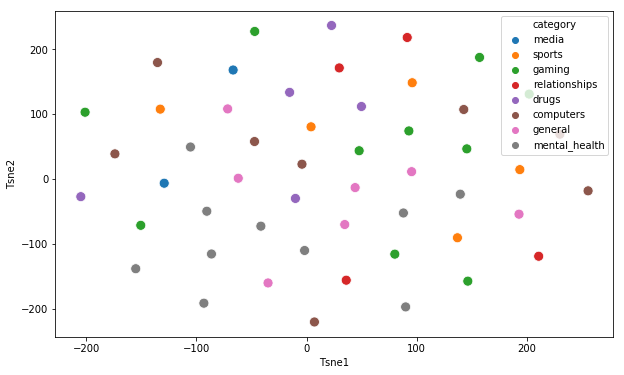

In [10]:
med=pd.read_csv('../Spark/coll_freqs_16-05.csv', header=None,  index_col=0)
med_nums=med.iloc[:,1:]

med_norm=norm.transform(med_nums.T).T

model=TSNE(n_iter=2000, perplexity=50.0, verbose=0)
twod=model.fit_transform(med_norm)

med['Tsne1']=twod[:,0]
med['Tsne2']=twod[:,1]
med['category']=''

for c, subs in dictionary.items():
    for s in subs:
        med.loc[s,'category']=c
        
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='category', data=med, s= 100)

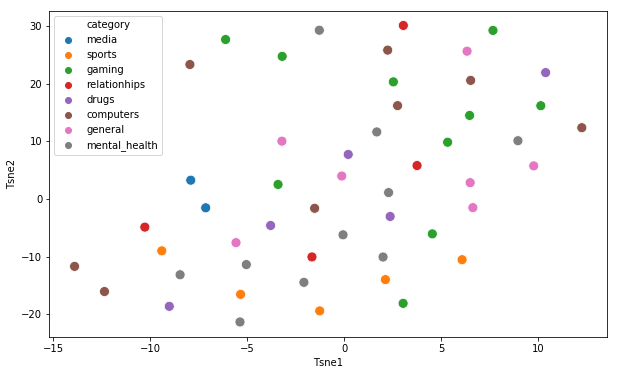

In [53]:
med=pd.read_csv('../Spark/coll_freqs_16-05.csv', header=None,  index_col=0)
med_nums=med.iloc[:,1:]

model=TSNE(n_iter=2000, perplexity=30.0, verbose=0)

twod=model.fit_transform(med_nums)

med['Tsne1']=twod[:,0]
med['Tsne2']=twod[:,1]
med['category']=''

for c, subs in dictionary.items():
    for s in subs:
        med.loc[s,'category']=c
        
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='category', data=med, s= 100)

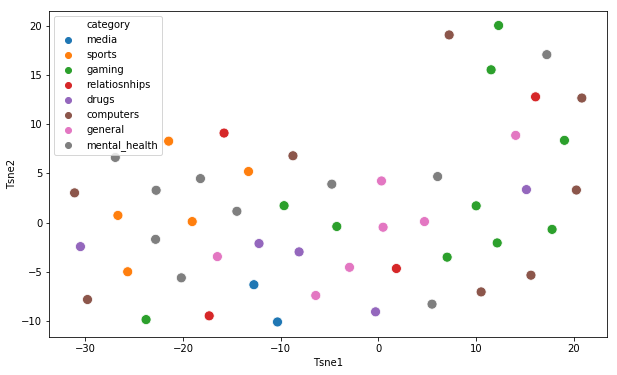

In [11]:
med=pd.read_csv('../Spark/coll_freqs_16-05.csv', header=None,  index_col=0)
med_nums=med.iloc[:,1:]

model=TSNE(n_iter=2000, perplexity=30.0, verbose=0)

twod=model.fit_transform(med_nums)

med['Tsne1']=twod[:,0]
med['Tsne2']=twod[:,1]
med['category']=''

for c, subs in dictionary.items():
    for s in subs:
        med.loc[s,'category']=c
        
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='category', data=med, s= 100)

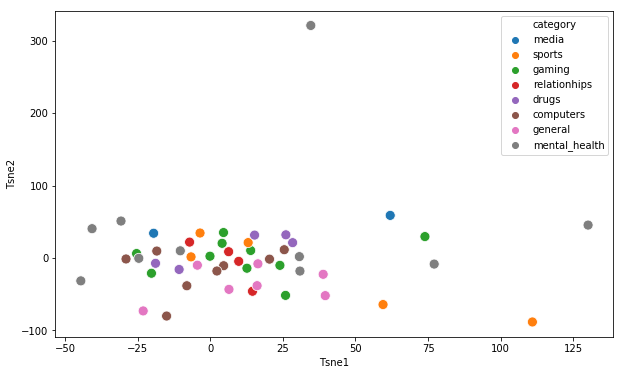

In [54]:
med=pd.read_csv('../Spark/coll_freqs_16-05.csv', header=None,  index_col=0)
med_nums=med.iloc[:,1:]

model=TSNE(n_iter=1000, perplexity=50.0, verbose=0)

twod=model.fit_transform(med_nums)

med['Tsne1']=twod[:,0]
med['Tsne2']=twod[:,1]
med['category']=''

for c, subs in dictionary.items():
    for s in subs:
        med.loc[s,'category']=c
        
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='category', data=med, s= 100)

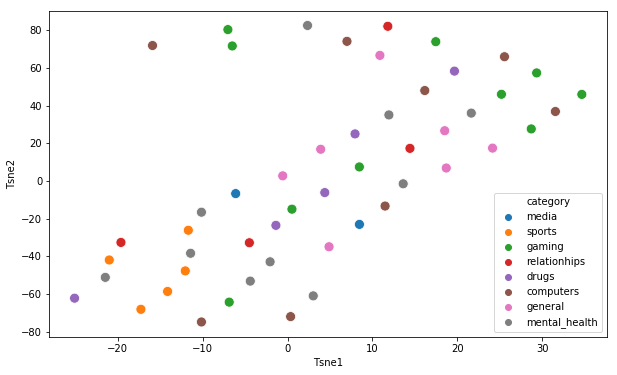

In [55]:

med=pd.read_csv('../Spark/coll_freqs_16-05.csv', header=None,  index_col=0)
med_nums=med.iloc[:,1:]

model=TSNE(n_iter=2000, perplexity=20.0, verbose=0)

twod=model.fit_transform(med_nums)

med['Tsne1']=twod[:,0]
med['Tsne2']=twod[:,1]
med['category']=''

for c, subs in dictionary.items():
    for s in subs:
        med.loc[s,'category']=c
        
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='category', data=med, s= 100)

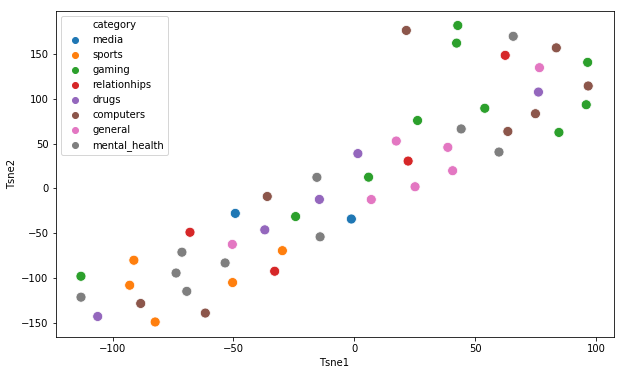

In [56]:
med=pd.read_csv('../Spark/coll_freqs_16-05.csv', header=None,  index_col=0)
med_nums=med.iloc[:,1:]

model=TSNE(n_iter=5000, perplexity=20.0, verbose=0)

twod=model.fit_transform(med_nums)

med['Tsne1']=twod[:,0]
med['Tsne2']=twod[:,1]
med['category']=''

for c, subs in dictionary.items():
    for s in subs:
        med.loc[s,'category']=c
        
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='category', data=med, s= 100)

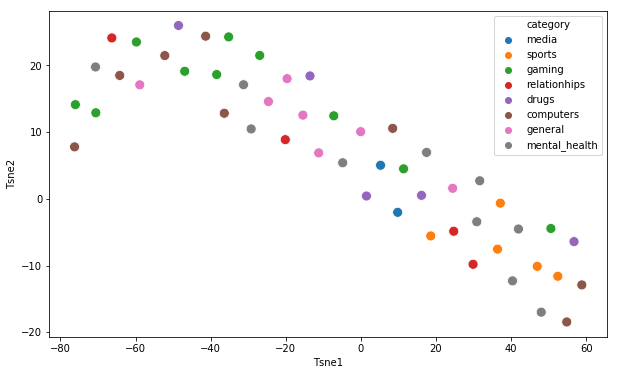

In [57]:
med=pd.read_csv('../Spark/coll_freqs_16-05.csv', header=None,  index_col=0)
med_nums=med.iloc[:,1:]

model=TSNE(n_iter=2000, perplexity=15.0, verbose=0)

twod=model.fit_transform(med_nums)

med['Tsne1']=twod[:,0]
med['Tsne2']=twod[:,1]
med['category']=''

for c, subs in dictionary.items():
    for s in subs:
        med.loc[s,'category']=c
        
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='category', data=med, s= 100)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 51 samples in 0.000s...
[t-SNE] Computed neighbors for 51 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 51 / 51
[t-SNE] Mean sigma: 43481.634560
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.636078
[t-SNE] Error after 2150 iterations: 0.104498


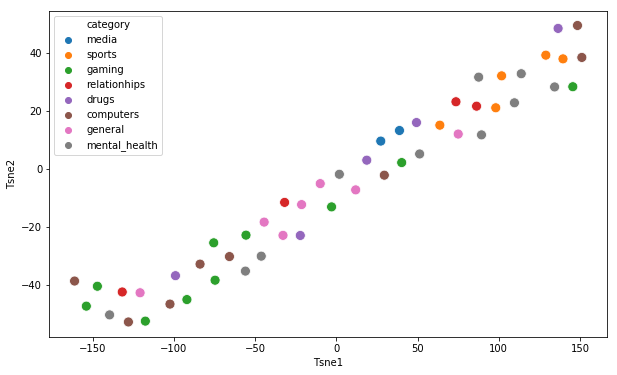

In [58]:
med=pd.read_csv('../Spark/coll_freqs_16-05.csv', header=None,  index_col=0)
med_nums=med.iloc[:,1:]

model=TSNE(n_iter=5000, perplexity=10.0, verbose=1)

twod=model.fit_transform(med_nums)

med['Tsne1']=twod[:,0]
med['Tsne2']=twod[:,1]
med['category']=''

for c, subs in dictionary.items():
    for s in subs:
        med.loc[s,'category']=c
        
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='category', data=med, s= 100)

# Subests? 

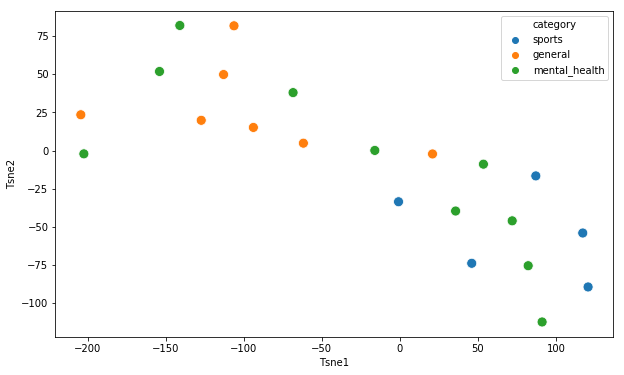

In [59]:
med=pd.read_csv('../Spark/coll_freqs_16-05.csv', header=None,  index_col=0)
med['category']=''
for c, subs in dictionary.items():
    for s in subs:
        med.loc[s,'category']=c

cats=['mental_health','general','sports']
med=med[med.category.isin(cats)].dropna()

med_nums=med.iloc[:,1:-1]

model=TSNE(n_iter=5000, perplexity=10.0)

twod=model.fit_transform(med_nums)

med['Tsne1']=twod[:,0]
med['Tsne2']=twod[:,1]


        
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='category', data=med, s= 100)

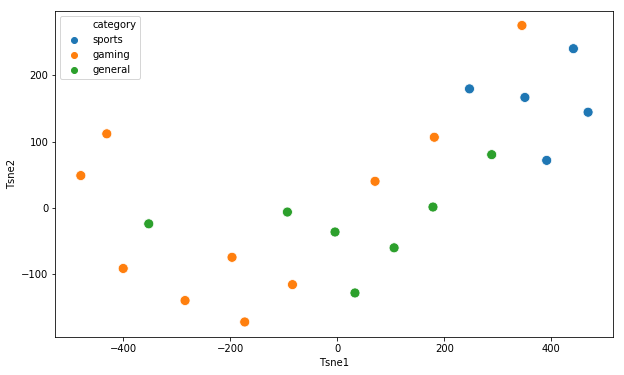

In [60]:
med=pd.read_csv('../Spark/coll_freqs_16-05.csv', header=None,  index_col=0)
med['category']=''
for c, subs in dictionary.items():
    for s in subs:
        med.loc[s,'category']=c

cats=['gaming','general','sports']
med=med[med.category.isin(cats)].dropna()

med_nums=med.iloc[:,1:-1]

model=TSNE(n_iter=5000, perplexity=10.0)

twod=model.fit_transform(med_nums)

med['Tsne1']=twod[:,0]
med['Tsne2']=twod[:,1]


        
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='category', data=med, s= 100)

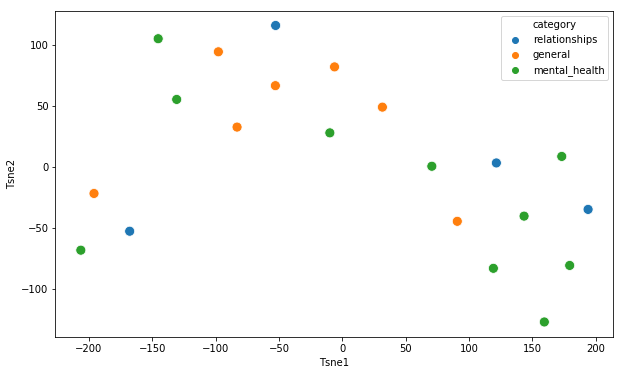

In [74]:
med=pd.read_csv('../Spark/coll_freqs_16-05.csv', header=None,  index_col=0)
med['category']=''
for c, subs in dictionary.items():
    for s in subs:
        med.loc[s,'category']=c

cats=['mental_health','relationships','general']
med=med[med.category.isin(cats)].dropna()

med_nums=med.iloc[:,1:-1]

model=TSNE(n_iter=5000, perplexity=10.0)

twod=model.fit_transform(med_nums)

med['Tsne1']=twod[:,0]
med['Tsne2']=twod[:,1]


        
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='category', data=med, s= 100)